(rotazione-notebook)=
# La rotazione fattoriale 

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("psych")
})

set.seed(42)

Nel capitolo {ref}`extraction-notebook` abbiamo visto come sia possibile ottenere la
soluzione fattoriale non ruotata per il numero di fattori comuni che
meglio riassume l'informazione contenuta nella matrice di correlazioni
(o covarianze). Tuttavia, questa soluzione non garantisce l’identificazione di gruppi omogenei e interpretabili di variabili osservate. Pertanto, si ricorre alla rotazione degli assi fattoriali per ottenere una soluzione più facilmente interpretabile rispetto a quella iniziale.


## Indeterminatezza della soluzione fattoriale

La necessità di effettuare la rotazione deriva dal fatto che la matrice delle saturazioni non ha un’unica soluzione. Attraverso trasformazioni matematiche, è possibile ottenere infinite matrici dello stesso ordine. Questo fenomeno è noto come indeterminatezza della soluzione fattoriale.

La matrice delle saturazioni fattoriali $\boldsymbol{\Lambda}$ non è univocamente definita poiché non esiste una soluzione unica per determinare le saturazioni fattoriali. Una matrice di correlazioni $\boldsymbol{R}$ può produrre diverse soluzioni fattoriali, ovvero matrici con lo stesso numero di fattori comuni ma con diverse configurazioni di saturazioni fattoriali, o matrici di saturazioni fattoriali corrispondenti a un diverso numero di fattori comuni.

**Esempio.** Siano $\boldsymbol{\Lambda}_1$ e $\boldsymbol{\Lambda}_2$ due matrici
aventi lo stesso numero di righe e colonne, ma contenenti saturazioni
fattoriali diverse. $\boldsymbol{\Lambda}_1$ è definita dai valori
seguenti

In [2]:
l1 <- matrix(c(
  0.766,  -0.232,
  0.670,  -0.203,
  0.574,  -0.174,
  0.454,   0.533,
  0.389,   0.457,
  0.324,   0.381
),
byrow = TRUE, ncol = 2
)

mentre per $\boldsymbol{\Lambda}_2$ abbiamo

In [3]:
l2 <- matrix(c(
  0.783,  0.163,
  0.685,  0.143,
  0.587,  0.123,
  0.143,  0.685,
  0.123,  0.587,
  0.102,  0.489
),
byrow = TRUE, ncol = 2
)

Esaminiamo la matrice delle correlazioni riprodotte dalle due matrici di
pesi fattoriali (con le comunalità sulla diagonale di $\boldsymbol{R}$):

In [4]:
l1 %*% t(l1)

0.640580,0.560316,0.480052,0.224108,0.191950,0.159792
0.560316,0.490109,0.419902,0.195981,0.167859,0.139737
0.480052,0.419902,0.359752,0.167854,0.143768,0.119682
0.224108,0.195981,0.167854,0.490205,0.420187,0.350169
0.191950,0.167859,0.143768,0.420187,0.360170,0.300153
0.159792,0.139737,0.119682,0.350169,0.300153,0.250137


In [5]:
l2 %*% t(l2)

0.639658,0.559664,0.479670,0.223624,0.191990,0.159573
0.559664,0.489674,0.419684,0.195910,0.168196,0.139797
0.479670,0.419684,0.359698,0.168196,0.144402,0.120021
0.223624,0.195910,0.168196,0.489674,0.419684,0.349551
0.191990,0.168196,0.144402,0.419684,0.359698,0.299589
0.159573,0.139797,0.120021,0.349551,0.299589,0.249525


Come si vede, viene ottenuto lo stesso risultato utilizzando matrici
$\boldsymbol{\Lambda}$ con lo stesso numero $m$ di colonne ma
saturazioni fattoriali diverse.

Si consideri ora il caso di matrici $\boldsymbol{\Lambda}$
corrispondenti a soluzioni fattoriali con un diverso numero di fattori
comuni. Siano $\boldsymbol{\Lambda}_1$ e $\boldsymbol{\Lambda}_2$ due
matrici aventi lo stesso numero di righe ma un numero diverso di
colonne:

In [6]:
l1 <- matrix(c(
  0.9,
  0.7,
  0.5,
  0.3
),
byrow = TRUE, ncol = 1
)

l2 <- matrix(c(
  0.78, 0.45,
  0.61, 0.35,
  0.43, 0.25,
  0.25, 0.15
),
byrow = TRUE, ncol = 2
)

Si noti che la stessa matrice di correlazioni riprodotte (con le
comunalità sulla diagonale principale) viene generata dalle saturazioni
fattoriali corrispondenti ad un numero diverso di fattori comuni:

In [7]:
l1 %*% t(l1)

0.81,0.63,0.45,0.27
0.63,0.49,0.35,0.21
0.45,0.35,0.25,0.15
0.27,0.21,0.15,0.09


In [8]:
l2 %*% t(l2)

0.8109,0.6333,0.4479,0.2625
0.6333,0.4946,0.3498,0.2050
0.4479,0.3498,0.2474,0.1450
0.2625,0.2050,0.1450,0.0850


## Parsimonia e semplicità

Per ottenere risultati affidabili dall’analisi fattoriale, si affronta il problema dell’indeterminazione fattoriale scegliendo la soluzione che soddisfa due criteri: il criterio della parsimonia e il criterio della semplicità. Il criterio della parsimonia suggerisce di scegliere il modello con il minor numero di fattori comuni che può spiegare la covarianza tra le variabili. Il criterio della semplicità suggerisce di preferire le strutture più semplici della matrice $\boldsymbol{\Lambda}$ a parità di numero di fattori (Thurstone, 1947).

Il criterio della parsimonia è facilmente applicabile: se due soluzioni fattoriali con un diverso numero di fattori riproducono allo stesso modo la matrice **S** o **R**, si sceglie quella con il minor numero di fattori. Se invece ci sono diverse soluzioni fattoriali con lo stesso numero m di fattori, il criterio della semplicità guida nella scelta della trasformazione più appropriata della matrice $\boldsymbol{\Lambda}$. Questa trasformazione è nota come rotazione. A seconda che i fattori ruotati siano o meno incorrelati, si distinguono metodi di rotazione ortogonale o obliqua dei fattori.

### Il criterio della struttura semplice

Attraverso la rotazione degli assi fattoriali, miriamo a ottenere una "struttura semplice" della matrice delle saturazioni fattoriali, caratterizzata da poche ma forti saturazioni diverse da zero e dall'assenza di variabili saturate da più di un fattore. Questo criterio è stato originariamente proposto da Thurstone (1947), secondo il quale viene raggiunto quando:

- Nella matrice fattoriale ruotata, ogni variabile ha almeno un peso nullo;
- Ogni fattore ha almeno $m$ saturazioni nulle ($m$: numero dei fattori comuni);
- Per ciascuna coppia di fattori ci sono saturazioni basse su un fattore e saturazioni alte sull'altro;
- Nel caso di molti fattori, per ciascuna coppia di fattori una grande proporzione di saturazioni dovrebbe essere nulla;
- Per ciascuna coppia di fattori, ci dovrebbero essere solo poche saturazioni di entità non trascurabile su entrambi i fattori.

Nella pratica, si cerca di massimizzare il numero di saturazioni nulle o quasi nulle nella matrice $\hat{\boldsymbol{\Lambda}}$ per ottenere la struttura semplice. Uno dei vantaggi principali è la facilitazione nell'interpretazione dei fattori (Cattell, 1978).

L'esame delle saturazioni fattoriali nella matrice ruotata $\hat{\boldsymbol{\Lambda}}^*$ consente di fornire un'interpretazione ai fattori. Per interpretare un fattore, dobbiamo considerare quali variabili sono maggiormente associate con esso e quanto forti sono questi legami. Se i coefficienti di impatto di un fattore sono positivi e elevati su un sottoinsieme di variabili osservate, deduciamo che il fattore rappresenta ciò che hanno in comune le variabili che saturano sul fattore. L'interpretazione si complica nel caso di variabili che saturano su più fattori.


## Rotazione nello spazio geometrico

### Rotazione ortogonale

Come è stato notato nella sezione precedente, la matrice
$\boldsymbol{\Lambda}$ non è *identificabile* poiché non esiste una
soluzione unica alla determinazione delle saturazioni fattoriali:
qualunque matrice
$\hat{\boldsymbol{\Lambda}}^* = \hat{\boldsymbol{\Lambda}}
\textbf{T}$, dove **T** è una matrice ortonormale di ordine $m$, è in
grado di riprodurre la matrice di varianze-covarianze allo stesso modo
di $\hat{\boldsymbol{\Lambda}}$. La matrice $\hat{\boldsymbol{\Lambda}}$
è pertanto determinata a meno della moltiplicazione per una matrice
ortonormale.

Geometricamente, i pesi fattoriali rappresentano le coordinate di un punto (ci sono tanti punti quante sono le $p$ variabili manifeste) in uno spazio con un numero di dimensioni pari al numero $m$ dei fattori. Il problema dell’indeterminazione fattoriale può essere descritto geometricamente come una rotazione rigida dei punti che rappresentano le saturazioni fattoriali attorno all’origine del sistema di coordinate. Questa rotazione rigida mantiene invariate le distanze tra i punti (ed è equivalente a una rotazione contraria del sistema di assi cartesiani) e produce un nuovo insieme di valori per i pesi fattoriali. Ognuno di questi insiemi di pesi fattoriali produce la stessa matrice di correlazioni riprodotte dal modello fattoriale. L’indeterminazione fattoriale deriva dal fatto che sono possibili infinite rotazioni diverse degli assi.


### Vincoli alla rotazione

Il problema della non identificabilità di $\hat{\boldsymbol{\Lambda}}$
viene generalmente risolto imponendo dei vincoli alla rotazione. Il
criterio che ci guida nella scelta di una delle possibili trasformazioni
della matrice dei pesi fattoriali è quello della *semplicità* della
matrice $\hat{\boldsymbol{\Lambda}}$ (Thurstone, 1947), ovvero la
vicinanza dei suoi elementi ai valori 0 e 1. Quanto più ciò si verifica
tanto più risulta semplice l'interpretazione dei fattori comuni nei
termini delle variabili. L'identificazione dei fattori risulta infatti
semplificata se ciascuno di essi è fortemente correlato con un numero
limitato di variabili ed è poco correlato con le altre.

Le rotazioni ortogonali lasciano immutate le comunalità nel caso di
fattori incorrelati. Questo accade perché qualunque rotazione rigida
rispetto all'origine preserva le distanze tra i punti identificati dai
pesi fattoriali e, nel caso di fattori incorrelati, la comunalità non è
nient'altro che la distanza dall'origine (al quadrato):

$$\hat{h}^2_i = \sum_{i=1}^m \hat{\lambda}_{ij}^2$$ 

Rotazioni non ortogonali, però, mutano la quota di varianza spiegata da ciascun
fattore, essendo questa data da

$$\frac{\sum_{i=1}^p \hat{\lambda}_{ij}^2}{\text{tr}(\textbf{S})}$$
oppure da

$$\frac{\sum_{i=1}^p \hat{\lambda}_{ij}^2}{\text{tr}(\textbf{R})}$$

laddove $\text{tr}(\textbf{R})=p$, con $i=1, \dots, p$ (numero di item)
e $j=1, \dots, m$ (numero di fattori).

Diversi algoritmi sono stati proposti per la rotazione ortogonale dei
fattori. Inizieremo ad esaminare una possibile soluzione al problema
dell'indeterminazione fattoriale mediante il metodo grafico. Esamineremo
poi i metodi Quartimax e Varimax.

### Metodo grafico

Per ruotare il sistema degli assi, se ci sono solo $m=2$ fattori, utilizziamo un sistema di coordinate bidimensionale per ottenere la loro rappresentazione geometrica. L'ispezione visiva del diagramma delle saturazioni fattoriali può guidare nella scelta della rotazione più appropriata. Le righe di $\hat{\boldsymbol{\Lambda}}$ corrispondono a coppie di pesi fattoriali ($\hat{\lambda}_{i1}, \hat{\lambda}_{i2}$, con $i=1, \dots, p$) che possono essere interpretate come le coordinate di $p$ punti (tanti quanti le variabili manifeste). Gli assi del diagramma vengono ruotati di un angolo $\phi$ per avvicinarli il più possibile ai punti presenti nel grafico. Le nuove coordinate
($\hat{\lambda}_{i1}^*, \hat{\lambda}_{i2}^*$) vengono calcolate come
$\hat{\boldsymbol{\Lambda}}^* = \hat{\boldsymbol{\Lambda}} \textbf{T}$,
dove 

$$
\textbf{T} = 
\left[
  \begin{array}{ c c }
  \cos{\phi} & - \sin{\phi}\\
  \sin{\phi} & \cos{\phi}
  \end{array} 
\right] 
$$ 

è una matrice ortogonale $2 \times 2$.

**Esempio.** Si considerino i dati di Brown, Williams e Barlow (1984) discussi da
Rencher (2002). Ad una bambina di dodici anni è stato chiesto di
valutare sette dei suoi conoscenti su cinque variabili: *kind*,
*intelligent*, *happy*, *likeable* e *just*. Per queste cinque
variabili, la matrice di correlazioni è

In [9]:
R <- matrix(c(
  1.00, .296, .881, .995, .545,
  .296, 1.000, -.022, .326, .837,
  .881, -.022, 1.000, .867, .130,
  .995, .326, .867, 1.000, .544,
  .545, .837, .130, .544, 1.00
),
ncol = 5, byrow = TRUE, dimnames = list(
  c("K", "I", "H", "L", "J"), c("K", "I", "H", "L", "J")
)
)

Dalla matrice **R** estraiamo due fattori con il metodo delle componenti
principali:

In [10]:
f.pc <- principal(R, 2, rotate = FALSE) 
f.pc

Specified rotation not found, rotate='none' used



Principal Components Analysis
Call: principal(r = R, nfactors = 2, rotate = FALSE)
Standardized loadings (pattern matrix) based upon correlation matrix
   PC1   PC2   h2     u2 com
K 0.97 -0.23 0.99 0.0067 1.1
I 0.52  0.81 0.92 0.0792 1.7
H 0.78 -0.59 0.96 0.0391 1.9
L 0.97 -0.21 0.99 0.0135 1.1
J 0.70  0.67 0.94 0.0597 2.0

                       PC1  PC2
SS loadings           3.26 1.54
Proportion Var        0.65 0.31
Cumulative Var        0.65 0.96
Proportion Explained  0.68 0.32
Cumulative Proportion 0.68 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.03 

Fit based upon off diagonal values = 1

Nella seguente figura, i punti rappresentano le cinque coppie di pesi
fattoriali non ruotati:

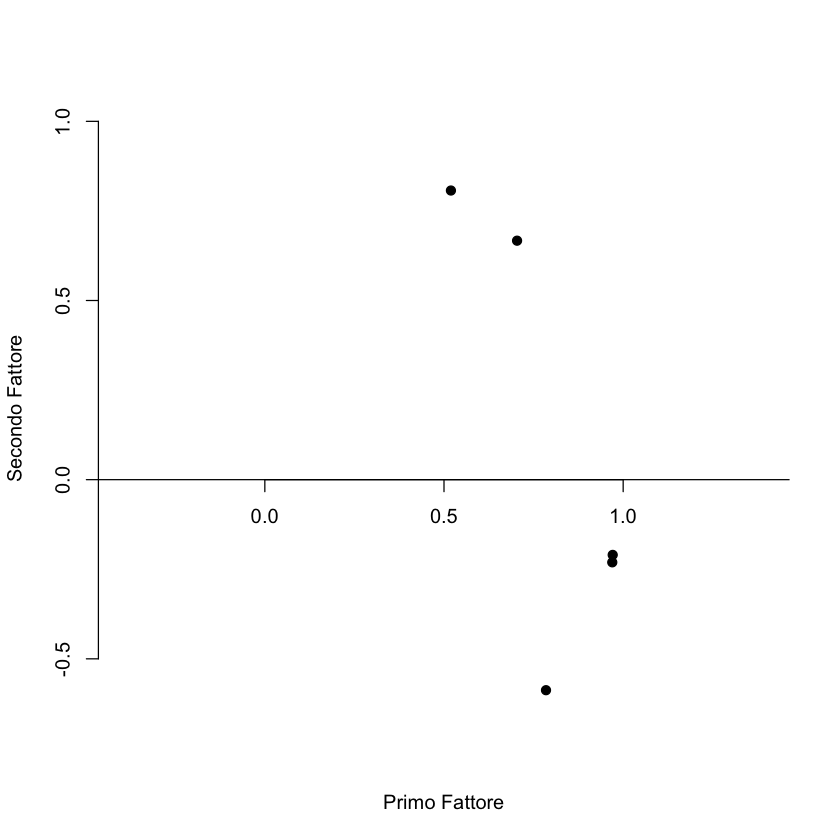

In [11]:
plot(
  f.pc$load[,1], f.pc$load[,2], bty = 'n', xaxt = 'n', 
  xlab = "Primo Fattore", ylab = "Secondo Fattore",
  ylim = c(-.6, 1), xlim = c(0,1), pch = 19, asp = 1)
  axis(1, pos = c(0,0))
  abline(0, 0)  

Rencher (2002) nota che, per questi dati, una rotazione ortogonale di
$-35^{\circ}$ ci porterebbe ad avvicinare gli assi ai punti nel
diagramma. Per verificare questo, disegnamo sul diagramma i nuovi assi
dopo una rotazione di $-35^{\circ}$. Le istruzioni `R` sono le seguenti:

0.000,0.000
0.574,0.819
0.000,0.000
0.819,-0.574


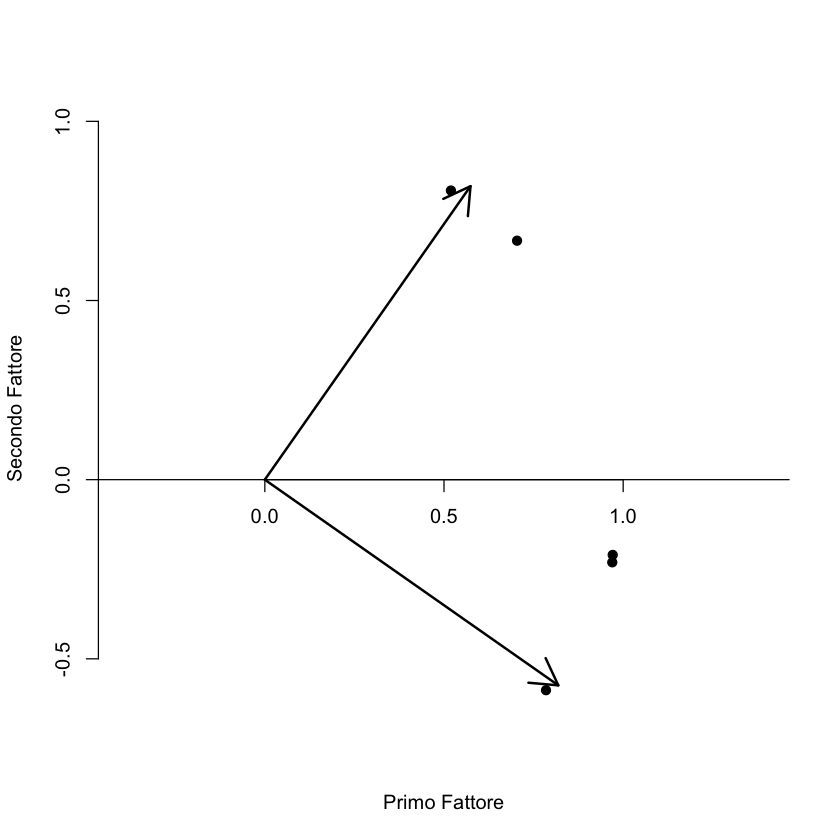

In [12]:
plot(
  f.pc$load[,1], f.pc$load[,2], bty = 'n', xaxt = 'n', 
  xlab = "Primo Fattore", ylab = "Secondo Fattore",
  ylim = c(-.6, 1), xlim = c(0,1), pch = 19, asp = 1)
  axis(1, pos = c(0,0))
  abline(0, 0) 
  
ar <- matrix(c(
  0, 0,
  0, 1,
  0, 0,
  1, 0
), ncol = 2, byrow = TRUE)

angle <- 35
rad <- angle * pi / 180
T <- matrix(c(
  cos(rad), -sin(rad),
  sin(rad),  cos(rad)
), ncol = 2, byrow = TRUE)

round(ar %*% T, 3)

arrows(0, 0, 0.574,  0.819, lwd = 2)
arrows(0, 0, 0.819, -0.574, lwd = 2)

Nella figura precedente, le due frecce rappresentano gli assi ruotati. È
chiaro come tale rotazione di $-35^{\circ}$ ha effettivamente l'effetto
di avvicinare gli assi ai punti del diagramma. Se usiamo dunque il
valore $\phi = -35^{\circ}$ nella matrice di rotazione, possiamo
calcolare le saturazioni fattoriali della soluzione ruotata
$\hat{\boldsymbol{\Lambda}}^* = \hat{\boldsymbol{\Lambda}} \textbf{T}$.
Le saturazioni fattoriali ruotate non sono altro che la proiezione
ortogonale dei punti sugli assi ruotati:

In [13]:
angle <- -35
rad <- angle * pi / 180
T <- matrix(c(
  cos(rad), -sin(rad),
  sin(rad),  cos(rad)
), ncol = 2, byrow = TRUE)
round(f.pc$load %*% T, 3)

K,0.927,0.367
I,-0.037,0.959
H,0.980,-0.031
L,0.916,0.385
J,0.194,0.950


La soluzione ottenuta in questo modo riproduce quella riportata da
Rencher (2002).

### Medodi di rotazione ortogonale

Un tipo di rotazione ortogonale molto utilizzato è la rotazione Varimax
(Kaiser, 1958). La matrice $\hat{\boldsymbol{\Lambda}}$ è semplificata
in modo tale che le varianze dei quadrati degli elementi $\lambda_{ij}$
appartenenti a colonne diverse di $\hat{\boldsymbol{\Lambda}}$ siano
massime. Se le saturazioni fattoriali in una colonna di
$\hat{\boldsymbol{\Lambda}}$ sono simili tra loro, la varianza sarà
prossima a zero. Tale varianza è tanto più grande quanto più i quadrati
degli elementi $\lambda_{ij}$ assumono valori prossimi a $0$ e $1$.
Amplificando le correlazioni più alte e riducendo quelle più basse, la
rotazione Varimax agevola l'interpretazione di ciascun fattore.

Usando la funzione `factanal()` del modulo base, la rotazione Varimax
può essere applicata alla soluzione ottenuta mediante il metodo di
massima verosimiglianza. Usando le funzioni `principal()` e
`factor.pa()` disponibili nel pacchetto `psych`, la rotazione Varimax
può essere applicata alle soluzioni ottenute mediante il metodo delle
componenti principali e il metodo del fattore principale. Ad esempio, otteniamo:

In [14]:
f_pc <- principal(R, 2, n.obs = 7, rotate = "varimax")
f_pc

Principal Components Analysis
Call: principal(r = R, nfactors = 2, rotate = "varimax", n.obs = 7)
Standardized loadings (pattern matrix) based upon correlation matrix
   RC1   RC2   h2     u2 com
K 0.95  0.30 0.99 0.0067 1.2
I 0.03  0.96 0.92 0.0792 1.0
H 0.97 -0.10 0.96 0.0391 1.0
L 0.94  0.32 0.99 0.0135 1.2
J 0.26  0.93 0.94 0.0597 1.2

                       RC1  RC2
SS loadings           2.81 1.99
Proportion Var        0.56 0.40
Cumulative Var        0.56 0.96
Proportion Explained  0.58 0.42
Cumulative Proportion 0.58 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.03 
 with the empirical chi square  0.12  with prob <  0.73 

Fit based upon off diagonal values = 1

Il metodo Quartimax (Neuhaus e Wringley, 1954) opera una semplificazione
della matrice $\hat{\boldsymbol{\Lambda}}$ massimizzando le covarianze
tra i quadrati degli elementi $\lambda_{ij}$ appartenenti a righe
diverse, subordinatamente alla condizione che la varianza delle righe
rimanga inalterata.

### Metodi di rotazione obliqua

Il termine “rotazione obliqua” è improprio poiché una rotazione implica una trasformazione ortogonale che preserva le distanze. Secondo Rencher (2002), un termine più appropriato sarebbe “trasformazione obliqua”. Tuttavia, il termine “rotazione obliqua” è di uso comune.

Nella rotazione obliqua, gli assi della soluzione ruotata non devono rimanere ortogonali e quindi possono avvicinarsi più facilmente ai raggruppamenti di punti nello spazio delle saturazioni fattoriali (se esistono). Esistono vari metodi analitici per ottenere una rotazione obliqua. Per esempio, nel metodo Direct Oblimin (Jennrich e Sampson, 1966), il criterio usato è
il seguente:

$$
\sum_{ij} \left(\sum_v \lambda_i^2 \lambda_j^2 - w \frac{1}{p} \sum_v \lambda_i^2
\sum_v \lambda_j^2\right)
$$ 

dove $\sum_{ij}$ si riferisce alla somma su tutte le coppie di fattori $ij$. In questo caso si procede ad una minimizzazione piuttosto che a una masssimizzazione.

## Matrice dei pesi fattoriali e matrice di struttura

Nella rotazione ortogonale i fattori sono incorrelati. Si consideri la situazione presentata nella figura successiva, con due variabili latenti incorrelate
($\xi_1$ e $\xi_2$) e quattro variabili manifeste ($y_1$, $y_2$, $y_3$,
$y_4$). Siano $\lambda_{11}$, $\lambda_{12}$, $\lambda_{13}$ e
$\lambda_{14}$ le saturazioni fattoriali delle variabili nel primo
fattore; siano $\lambda_{21}$, $\lambda_{22}$, $\lambda_{23}$ e
$\lambda_{24}$ le saturazioni fattoriali delle variabili nel secondo
fattore.

```{figure} images/rot_4.png
---
height: 300px
name: orto-rot-fig
---
Rotazione ortogonale.
```

In un diagramma di percorso, la correlazione tra due variabili è uguale alla somma dei valori numerici di tutti i percorsi legittimi che le collegano. Se i fattori comuni sono incorrelati, c’è un unico percorso legittimo che collega ciascuna variabile manifesta a ciascun fattore comune in base alle regole di Wright. Le correlazioni tra variabili manifeste e fattori comuni sono quindi uguali alle saturazioni fattoriali. Nel caso di fattori comuni incorrelati, dunque, la matrice delle saturazioni fattoriali descrive le correlazioni tra variabili e fattori. Le saturazioni fattoriali possono essere interpretate come i pesi beta del modello di regressione multipla, ovvero come la stima del contributo specifico di ciascun fattore comune nella determinazione della varianza spiegata degli item (Tabachnick & Fidell, 2001).

Nel caso della rotazione obliqua, la soluzione fattoriale ruotata produce un insieme di fattori comuni correlati tra loro. Di conseguenza, la matrice delle saturazioni fattoriali non descrive le correlazioni tra variabili e fattori. In un diagramma di percorso ci sono almeno due percorsi legittimi che collegano ciascuna variabile manifesta a ciascun fattore comune in base alle regole di Wright. Nel caso di una rotazione obliqua è quindi necessario specificare tre diverse matrici:

-   la matrice delle saturazioni fattoriali, $\hat{\boldsymbol{\Lambda}}$, detta
    *matrice pattern* (*factor pattern matrix*, o "configurazione," o
    "matrice dei modelli");
-   la matrice delle correlazioni tra variabili manifeste e fattori, detta *matrice di struttura* (*factor structure matrix*);
-   la  matrice che esprime le correlazioni tra i fattori, $\hat{\boldsymbol{\Phi}}$, detta *matrice di intercorrelazione fattoriale*.

In questo caso, la matrice pattern rappresenta l'analogo dei coefficienti parziali di regressione della variabile sul fattore, al netto degli altri fattori. Nel caso
della rotazione obliqua, è la matrice che viene usata per determinare in
che grado è stata raggiunta la "struttura semplice".

Esaminiamo in dettaglio la soluzione fattoriale prodotta da una rotazione obliqua. In questo caso, gli assi che rappresentano i fattori non sono ortogonali (ovvero, i fattori sono correlati) e, in un diagramma di percorso, le variabili manifeste sono collegate ai fattori attraverso due tipi distinti di percorsi che rappresentano l'effetto "diretto" e "indiretto" dei fattori sulle variabili. Nel caso di una rotazione obliqua, le saturazioni fattoriali non coincidono con le correlazioni tra variabili e fattori. Si consideri la figura \@ref(fig:fact-rot5). Nel caso di una rotazione obliqua, la correlazione tra i due fattori comuni viene rappresentata mediante la freccia non direzionata $\phi_{12}$ che collega $\xi_1$ e $\xi_2$. Nel diagramma di percorso della figura successiva ci sono due percorsi legittimi che, in base alle regole di Wright, consentono di collegare ciascuna variabile manifesta a un fattore comune.

Ad esempio, per la variabile $y_1$ e il fattore $\xi_1$, i percorsi sono: la freccia causale $\lambda_{11}$ che rappresenta l'effetto diretto di $\xi_1$ su $y_1$ e il percorso composto che rappresenta l'effetto indiretto di $\xi_1$ su $y_1$, il cui valore numerico è uguale al prodotto $\lambda_{21}\phi_{12}$. Nell'analisi dei percorsi, la correlazione tra $\xi_1$ e $y_1$ è uguale alla somma dei valori numerici dei percorsi legittimi che collegano $y_1$ a $\xi_1$, ovvero $\lambda_{11} + \lambda_{21} \phi_{12}$.

```{figure} images/rot_5.png
---
height: 300px
name: obl-rot-fig
---
Rotazione obliqua.
```

Per illustrare la rotazione obliqua, utilizziamo i dati discussi da
Rencher (2002). Si consideri la matrice di correlazione presentata qui sotto.

In [15]:
R <- matrix(
      c( 
        1.00,  0.735, 0.711, 0.704,
        0.735, 1.00,  0.693, 0.709,
        0.711, 0.693, 1.00,  0.839,
        0.704, 0.709, 0.839, 1.00
      ), 
      ncol = 4, 
      byrow = TRUE
    ) 
R

1.000,0.735,0.711,0.704
0.735,1.000,0.693,0.709
0.711,0.693,1.000,0.839
0.704,0.709,0.839,1.000


Iniziamo calcolando la soluzione a due fattori mediante il metodo delle
componenti principali e una rotazione Varimax (ovvero, ortogonale). Otteniamo le seguenti saturazioni fattoriali.

In [16]:
f1_pc <- principal(R, 2, rotate = "varimax") 
f1_pc

Principal Components Analysis
Call: principal(r = R, nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
   RC1  RC2   h2    u2 com
1 0.50 0.78 0.86 0.140 1.7
2 0.47 0.81 0.88 0.124 1.6
3 0.90 0.33 0.92 0.078 1.3
4 0.89 0.35 0.92 0.083 1.3

                       RC1  RC2
SS loadings           2.08 1.50
Proportion Var        0.52 0.37
Cumulative Var        0.52 0.89
Proportion Explained  0.58 0.42
Cumulative Proportion 0.58 1.00

Mean item complexity =  1.5
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 

Fit based upon off diagonal values = 0.99

Si noti che i due fattori non sono molto distinti. Consideriamo dunque la soluzione  prodotta da una rotazione obliqua. Usiamo qui l'algoritmo Oblimin.

In [17]:
pr_oblimin <- principal(R, 2, rotate = "oblimin")

Loading required namespace: GPArotation



La matrice $\hat{\boldsymbol{\Lambda}}$ delle saturazioni fattoriali si ricava come indicato di seguito.

In [18]:
cbind(pr_oblimin$load[, 1], pr_oblimin$load[, 2])

0.03206780,0.90186261
-0.02543116,0.95556536
0.96858605,-0.01096737
0.94726778,0.01327683


La matrice $\hat{\boldsymbol{\Phi}}$ di inter-correlazione fattoriale è la seguente.

In [19]:
pr_oblimin$Phi

,TC1,TC2
TC1,1.0000000,0.7869776
TC2,0.7869776,1.0000000


La matrice di struttura, che riporta le correlazioni tra indicatori e fattori comuni, si ottiene pre-moltiplicando la matrice $\boldsymbol{\Lambda}$ delle saturazioni fattoriali alla matrice $\boldsymbol{\Phi}$ di inter-correlazione fattoriale.

$$
\text{matrice di struttura} = \boldsymbol{\Lambda}\boldsymbol{\Phi}.
$$

Per esempio, la correlazione tra la prima variabile manifesta e il primo fattore si ottiene nel modo seguente.

In [20]:
pr_oblimin$load[1, 1] + pr_oblimin$load[1, 2] * pr_oblimin$Phi[2, 1]

TC1 
0.7418135

L'intera matrice di struttura si può trovare eseguendo la moltiplicazione  $\boldsymbol{\Lambda}\boldsymbol{\Phi}$.

In [21]:
pr_oblimin$load %*% pr_oblimin$Phi %>% 
  round(3)

TC1,TC2
0.742,0.927
0.727,0.936
0.960,0.751
0.958,0.759


## Esempio con `semTools`

Presento qui un esempio di uso di vari metodi di estrazione fattoriale. Tra tali  metodi, la rotazione obliqua Geomin è molto popolare ed è il default di M-Plus. 

Iniziamo a caricare il pacchetto `semTools`.

In [22]:
suppressPackageStartupMessages(library("semTools")) 

Eseguiamo l'analisi fattoriale esplorativa del classico set di dati di Holzinger e Swineford (1939) il quale è costituito dai punteggi dei test di abilità mentale di bambini di seconda e terza media di due scuole diverse (Pasteur e Grant-White). Nel set di dati originale (disponibile nel pacchetto `MBESS`), sono forniti i punteggi di 26 test. Tuttavia, un sottoinsieme più piccolo con 9 variabili è più ampiamente utilizzato in letteratura. Questi sono i dati qui usati. 

Nel presente esempio, verrà eseguita l'analisi fattoriale esplorativa con l'estrazione di tre fattori. Il metodo di estrazione è `mlr`:

> maximum likelihood estimation with robust (Huber-White) standard errors and a scaled test statistic that is (asymptotically) equal to the Yuan-Bentler test statistic. For both complete and incomplete data.

La soluzione iniziale non è ruotata. 

In [23]:
unrotated <- efaUnrotate(HolzingerSwineford1939, nf=3, varList=paste0("x", 1:9), estimator="mlr")
out = summary(unrotated)
print(out)

lavaan 0.6.15 ended normally after 203 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        36

  Number of observations                           301

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                22.897      23.864
  Degrees of freedom                                12          12
  P-value (Chi-square)                           0.029       0.021
  Scaling correction factor                                  0.959
    Yuan-Bentler correction (Mplus variant)                       

Parameter Estimates:

  Standard errors                             Sandwich
  Information bread                           Observed
  Observed information based on                Hessian

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  factor1 =~                            

Si noti che, in assenza di rotazione, è impossibile assegnare un significato ai fattori comuni.

### Orthogonal varimax

Utilizziamo ora la rotazione ortogonale Varimax.

In [24]:
out_varimax <- orthRotate(unrotated, method="varimax")
out = summary(out_varimax, sort = FALSE, suppress = 0.3)
print(out)

Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


   factor1 factor2 factor3
x1  0.320*  0.607*        
x2          0.481*        
x3          0.662*        
x4  0.838*                
x5  0.867*                
x6  0.815*                
x7                  0.695*
x8                  0.704*
x9          0.409*  0.511*

Factor Correlation
        factor1 factor2 factor3
factor1       1       0       0
factor2       0       1       0
factor3       0       0       1

Method of rotation:	varimax 

Test Statistics for Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.320 0.055  5.799 0.000    0.212    0.428
2  factor1 =~  x2       0.135 0.063  2.151 0.031    0.012    0.259
3  factor1 =~  x3       0.080 0.049  1.622 0.105   -0.017    0.176
4  factor1 =~  x4       0.838 0.028 30.193 0.000    0.784    0.892
5  factor1 =~  x5       0.867 0.024 36.188 0.000    0.820    0.914
6  factor1 =~  x6       0.815 0.024 33.939 0.000    0.768    0.862
7  factor1 =~  x7       0.102 0.049  2.059 0.040    0.005    0.199
8  factor1 =~  x8       0.078 0.048  1.618 0.106   -0.016    0.172
9  factor1 =~  x9       0.170 0.053  3.222 0.001    0.067    0.273
10 factor2 =~  x1       0.607 0.075  8.138 0.000    0.461    0.753
11 factor2 =~  x2       0.481 0.067  7.184 0.000    0.350    0.612
12 factor2 =~  x3       0.662 0.058 11.499 0.000    0.549    0.775
13 factor2 =~  x4       0.113 0.043  2.615 0.009    0.028    0.198
14 factor2 =~  x5       0.032 0.040  0.802 0.422   -0.047    0

       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.320 0.055  5.799 0.000    0.212    0.428
2  factor1 =~  x2       0.135 0.063  2.151 0.031    0.012    0.259
3  factor1 =~  x3       0.080 0.049  1.622 0.105   -0.017    0.176
4  factor1 =~  x4       0.838 0.028 30.193 0.000    0.784    0.892
5  factor1 =~  x5       0.867 0.024 36.188 0.000    0.820    0.914
6  factor1 =~  x6       0.815 0.024 33.939 0.000    0.768    0.862
7  factor1 =~  x7       0.102 0.049  2.059 0.040    0.005    0.199
8  factor1 =~  x8       0.078 0.048  1.618 0.106   -0.016    0.172
9  factor1 =~  x9       0.170 0.053  3.222 0.001    0.067    0.273
10 factor2 =~  x1       0.607 0.075  8.138 0.000    0.461    0.753
11 factor2 =~  x2       0.481 0.067  7.184 0.000    0.350    0.612
12 factor2 =~  x3       0.662 0.058 11.499 0.000    0.549    0.775
13 factor2 =~  x4       0.113 0.043  2.615 0.009    0.028    0.198
14 factor2 =~  x5       0.032 0.040  0.802 0.422   -0.047    0

### Orthogonal Quartimin

Un metodo alternativo per la rotazione ortogonale è Quartimin.

In [25]:
out_quartimin <- orthRotate(unrotated, method="quartimin")
out = summary(out_quartimin, sort = FALSE, suppress = 0.3)
print(out)

Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


   factor1 factor2 factor3
x1  0.353*  0.590*        
x2          0.474*        
x3          0.657*        
x4  0.844*                
x5  0.869*                
x6  0.823*                
x7                  0.692*
x8                  0.702*
x9          0.397*  0.508*

Factor Correlation
        factor1 factor2 factor3
factor1       1       0       0
factor2       0       1       0
factor3       0       0       1

Method of rotation:	Quartimin 

Test Statistics for Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.353 0.062  5.720 0.000    0.232    0.473
2  factor1 =~  x2       0.158 0.066  2.375 0.018    0.028    0.288
3  factor1 =~  x3       0.115 0.057  2.015 0.044    0.003    0.226
4  factor1 =~  x4       0.844 0.027 30.814 0.000    0.790    0.898
5  factor1 =~  x5       0.869 0.023 37.224 0.000    0.823    0.914
6  factor1 =~  x6       0.823 0.024 35.026 0.000    0.777    0.869
7  factor1 =~  x7       0.116 0.054  2.161 0.031    0.011    0.222
8  factor1 =~  x8       0.104 0.054  1.914 0.056   -0.003    0.210
9  factor1 =~  x9       0.202 0.059  3.403 0.001    0.086    0.319
10 factor2 =~  x1       0.590 0.078  7.523 0.000    0.436    0.743
11 factor2 =~  x2       0.474 0.068  6.935 0.000    0.340    0.608
12 factor2 =~  x3       0.657 0.059 11.204 0.000    0.542    0.771
13 factor2 =~  x4       0.072 0.041  1.748 0.080   -0.009    0.152
14 factor2 =~  x5      -0.010 0.039 -0.263 0.793   -0.087    0

       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.353 0.062  5.720 0.000    0.232    0.473
2  factor1 =~  x2       0.158 0.066  2.375 0.018    0.028    0.288
3  factor1 =~  x3       0.115 0.057  2.015 0.044    0.003    0.226
4  factor1 =~  x4       0.844 0.027 30.814 0.000    0.790    0.898
5  factor1 =~  x5       0.869 0.023 37.224 0.000    0.823    0.914
6  factor1 =~  x6       0.823 0.024 35.026 0.000    0.777    0.869
7  factor1 =~  x7       0.116 0.054  2.161 0.031    0.011    0.222
8  factor1 =~  x8       0.104 0.054  1.914 0.056   -0.003    0.210
9  factor1 =~  x9       0.202 0.059  3.403 0.001    0.086    0.319
10 factor2 =~  x1       0.590 0.078  7.523 0.000    0.436    0.743
11 factor2 =~  x2       0.474 0.068  6.935 0.000    0.340    0.608
12 factor2 =~  x3       0.657 0.059 11.204 0.000    0.542    0.771
13 factor2 =~  x4       0.072 0.041  1.748 0.080   -0.009    0.152
14 factor2 =~  x5      -0.010 0.039 -0.263 0.793   -0.087    0

### Oblique Quartimin

L'algoritmo Quartimin può anche essere usato per una soluzione obliqua.

In [26]:
out_oblq <- oblqRotate(unrotated, method="quartimin")
out = summary(out_oblq, sort = FALSE, suppress = 0.3)
print(out)

Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


   factor1 factor2 factor3
x1          0.602*        
x2          0.505*        
x3          0.689*        
x4  0.840*                
x5  0.888*                
x6  0.808*                
x7                  0.723*
x8                  0.701*
x9          0.366*  0.463*

Factor Correlation
          factor1   factor2   factor3
factor1 1.0000000 0.3257784 0.2164388
factor2 0.3257784 1.0000000 0.2704753
factor3 0.2164388 0.2704753 1.0000000

Method of rotation:	Quartimin 

Test Statistics for Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.191 0.064  2.965 0.003    0.065    0.317
2  factor1 =~  x2       0.044 0.066  0.665 0.506   -0.085    0.172
3  factor1 =~  x3      -0.069 0.034 -2.031 0.042   -0.137   -0.002
4  factor1 =~  x4       0.840 0.033 25.622 0.000    0.776    0.905
5  factor1 =~  x5       0.888 0.027 32.583 0.000    0.835    0.942
6  factor1 =~  x6       0.808 0.028 28.441 0.000    0.752    0.863
7  factor1 =~  x7       0.044 0.037  1.179 0.238   -0.029    0.116
8  factor1 =~  x8      -0.033 0.036 -0.916 0.360   -0.103    0.037
9  factor1 =~  x9       0.035 0.048  0.728 0.467   -0.059    0.129
10 factor2 =~  x1       0.602 0.086  7.003 0.000    0.434    0.771
11 factor2 =~  x2       0.505 0.071  7.163 0.000    0.367    0.644
12 factor2 =~  x3       0.689 0.056 12.344 0.000    0.580    0.799
13 factor2 =~  x4       0.022 0.045  0.483 0.629   -0.067    0.110
14 factor2 =~  x5      -0.067 0.036 -1.890 0.059   -0.137    0

       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.191 0.064  2.965 0.003    0.065    0.317
2  factor1 =~  x2       0.044 0.066  0.665 0.506   -0.085    0.172
3  factor1 =~  x3      -0.069 0.034 -2.031 0.042   -0.137   -0.002
4  factor1 =~  x4       0.840 0.033 25.622 0.000    0.776    0.905
5  factor1 =~  x5       0.888 0.027 32.583 0.000    0.835    0.942
6  factor1 =~  x6       0.808 0.028 28.441 0.000    0.752    0.863
7  factor1 =~  x7       0.044 0.037  1.179 0.238   -0.029    0.116
8  factor1 =~  x8      -0.033 0.036 -0.916 0.360   -0.103    0.037
9  factor1 =~  x9       0.035 0.048  0.728 0.467   -0.059    0.129
10 factor2 =~  x1       0.602 0.086  7.003 0.000    0.434    0.771
11 factor2 =~  x2       0.505 0.071  7.163 0.000    0.367    0.644
12 factor2 =~  x3       0.689 0.056 12.344 0.000    0.580    0.799
13 factor2 =~  x4       0.022 0.045  0.483 0.629   -0.067    0.110
14 factor2 =~  x5      -0.067 0.036 -1.890 0.059   -0.137    0

### Orthogonal Geomin

Consideriamo ora la rotazione Geomin. L'algoritmo Geomin fornisce un metodo di rotazione che riduce al minimo la media geometrica delle saturazioni fattoriali innalzate al quadrato. Qui è usato per ottenere una soluzione ortogonale.

In [27]:
out_geomin_orh <- orthRotate(unrotated, method="geomin")
out = summary(out_geomin_orh, sort=FALSE, suppress=0.3)
print(out)

Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


   factor1 factor2 factor3
x1  0.315          -0.621 
x2                 -0.474*
x3                 -0.671*
x4  0.838*                
x5  0.867*                
x6  0.814*                
x7          0.696*        
x8          0.677*        
x9          0.456* -0.468 

Factor Correlation
        factor1 factor2 factor3
factor1       1       0       0
factor2       0       1       0
factor3       0       0       1

Method of rotation:	Geomin 

Test Statistics for Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.315 0.633  0.499 0.618   -0.925    1.555
2  factor1 =~  x2       0.130 0.509  0.255 0.799   -0.868    1.128
3  factor1 =~  x3       0.074 0.672  0.110 0.912   -1.244    1.392
4  factor1 =~  x4       0.838 0.126  6.644 0.000    0.591    1.085
5  factor1 =~  x5       0.867 0.047 18.395 0.000    0.775    0.960
6  factor1 =~  x6       0.814 0.176  4.623 0.000    0.469    1.159
7  factor1 =~  x7       0.112 0.112  0.993 0.321   -0.109    0.332
8  factor1 =~  x8       0.085 0.157  0.542 0.588   -0.222    0.392
9  factor1 =~  x9       0.172 0.409  0.421 0.674   -0.629    0.973
10 factor2 =~  x1       0.053 0.112  0.475 0.635   -0.166    0.272
11 factor2 =~  x2      -0.099 0.087 -1.142 0.254   -0.269    0.071
12 factor2 =~  x3       0.033 0.069  0.482 0.630   -0.103    0.169
13 factor2 =~  x4       0.051 0.136  0.374 0.708   -0.215    0.317
14 factor2 =~  x5       0.054 0.158  0.340 0.734   -0.256    0

       lhs op rhs std.loading    se      z     p ci.lower ci.upper
1  factor1 =~  x1       0.315 0.633  0.499 0.618   -0.925    1.555
2  factor1 =~  x2       0.130 0.509  0.255 0.799   -0.868    1.128
3  factor1 =~  x3       0.074 0.672  0.110 0.912   -1.244    1.392
4  factor1 =~  x4       0.838 0.126  6.644 0.000    0.591    1.085
5  factor1 =~  x5       0.867 0.047 18.395 0.000    0.775    0.960
6  factor1 =~  x6       0.814 0.176  4.623 0.000    0.469    1.159
7  factor1 =~  x7       0.112 0.112  0.993 0.321   -0.109    0.332
8  factor1 =~  x8       0.085 0.157  0.542 0.588   -0.222    0.392
9  factor1 =~  x9       0.172 0.409  0.421 0.674   -0.629    0.973
10 factor2 =~  x1       0.053 0.112  0.475 0.635   -0.166    0.272
11 factor2 =~  x2      -0.099 0.087 -1.142 0.254   -0.269    0.071
12 factor2 =~  x3       0.033 0.069  0.482 0.630   -0.103    0.169
13 factor2 =~  x4       0.051 0.136  0.374 0.708   -0.215    0.317
14 factor2 =~  x5       0.054 0.158  0.340 0.734   -0.256    0

### Oblique Geomin

La rotazione Geomin può anche essere usata per ottenere una soluzione obliqua.

In [28]:
out_geomin_obl <- oblqRotate(unrotated, method="geomin")
out = summary(out_geomin_obl, sort = FALSE, suppress = 0.3)
print(out)

Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


   factor1 factor2 factor3
x1                 -0.604*
x2                 -0.507*
x3                 -0.691*
x4  0.839*                
x5  0.887*                
x6  0.806*                
x7          0.726*        
x8          0.703*        
x9          0.463* -0.368*

Factor Correlation
           factor1    factor2    factor3
factor1  1.0000000  0.2296197 -0.3271561
factor2  0.2296197  1.0000000 -0.2776935
factor3 -0.3271561 -0.2776935  1.0000000

Method of rotation:	Geomin 

Test Statistics for Standardized Rotated Factor Loadings


Warning message in testLoadings(object):
“The standard error is currently invalid because it does not account for the variance of the rotation function. It is simply based on the delta method.”


       lhs op rhs std.loading    se       z     p ci.lower ci.upper
1  factor1 =~  x1       0.188 0.070   2.670 0.008    0.050    0.326
2  factor1 =~  x2       0.044 0.054   0.806 0.420   -0.062    0.150
3  factor1 =~  x3      -0.073 0.050  -1.466 0.143   -0.170    0.024
4  factor1 =~  x4       0.839 0.032  26.467 0.000    0.777    0.901
5  factor1 =~  x5       0.887 0.029  30.078 0.000    0.829    0.945
6  factor1 =~  x6       0.806 0.030  26.717 0.000    0.747    0.865
7  factor1 =~  x7       0.031 0.034   0.914 0.361   -0.036    0.099
8  factor1 =~  x8      -0.045 0.048  -0.949 0.343   -0.139    0.048
9  factor1 =~  x9       0.025 0.034   0.746 0.455   -0.041    0.091
10 factor2 =~  x1       0.029 0.051   0.566 0.571   -0.071    0.129
11 factor2 =~  x2      -0.119 0.072  -1.663 0.096   -0.260    0.021
12 factor2 =~  x3       0.020 0.037   0.538 0.590   -0.052    0.092
13 factor2 =~  x4       0.007 0.043   0.174 0.862   -0.076    0.091
14 factor2 =~  x5       0.010 0.036   0.285 0.77

       lhs op rhs std.loading    se       z     p ci.lower ci.upper
1  factor1 =~  x1       0.188 0.070   2.670 0.008    0.050    0.326
2  factor1 =~  x2       0.044 0.054   0.806 0.420   -0.062    0.150
3  factor1 =~  x3      -0.073 0.050  -1.466 0.143   -0.170    0.024
4  factor1 =~  x4       0.839 0.032  26.467 0.000    0.777    0.901
5  factor1 =~  x5       0.887 0.029  30.078 0.000    0.829    0.945
6  factor1 =~  x6       0.806 0.030  26.717 0.000    0.747    0.865
7  factor1 =~  x7       0.031 0.034   0.914 0.361   -0.036    0.099
8  factor1 =~  x8      -0.045 0.048  -0.949 0.343   -0.139    0.048
9  factor1 =~  x9       0.025 0.034   0.746 0.455   -0.041    0.091
10 factor2 =~  x1       0.029 0.051   0.566 0.571   -0.071    0.129
11 factor2 =~  x2      -0.119 0.072  -1.663 0.096   -0.260    0.021
12 factor2 =~  x3       0.020 0.037   0.538 0.590   -0.052    0.092
13 factor2 =~  x4       0.007 0.043   0.174 0.862   -0.076    0.091
14 factor2 =~  x5       0.010 0.036   0.285 0.77

## Interpretazione 

Per interpretare i fattori comuni latenti, dobbiamo decidere se usare la matrice pattern o la matrice struttura. Un fattore individuato dall'analisi fattoriale è una caratteristica latente univariata che rappresenta l'essenza di un fenomeno psicologico. Dovrebbe essere interpretato come il significato semplice che si trova dietro l'intersezione dei significati delle variabili che saturano nel fattore.

Nella rotazione obliqua, i fattori sono correlati ma vogliamo comunque interpretarli come dimensioni psicologiche distinte. L'etichetta che diamo al fattore $F_1$ dovrebbe aiutare a separare teoricamente il fenomeno psicologico corrispondente a $F_1$ dal fenomeno denotato dall'etichetta del fattore $F_2$, anche se sono correlati.

Se questa è la strategia interpretativa, allora lo strumento principale per l'interpretazione è la matrice pattern. I coefficienti della matrice pattern mostrano l'influenza causale del fattore comune sulle variabili manifeste. La matrice struttura descrive le correlazioni tra variabili e fattori e dipende sia dai percorsi diretti che indiretti. Quindi, non descrive gli effetti diretti dei fattori comuni latenti sulle variabili manifeste ma solo la covariazione tra di loro.
